<a href="https://colab.research.google.com/github/thisismcgovern/diabetes-risk-analysis/blob/main/Diabetes_Data_Analysis_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Load

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
df = pd.read_csv('diabetes.csv')

## Basic Inspection of Data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning.

In [11]:
col_to_clean = ['Glucose', 'BloodPressure', 'Insulin', 'BMI']
df[col_to_clean] = df[col_to_clean].replace(0, pd.NA)
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,0
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [15]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    object 
 2   BloodPressure             733 non-null    object 
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   394 non-null    object 
 5   BMI                       757 non-null    object 
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 54.1+ KB


## Feature Engeneering

1. BMI Class

In [18]:
def bmi_class(BMI):

    if pd.isna(BMI):
        return 'Unknown'
    if BMI < 18.5:
        return 'Underweight'
    elif BMI < 25:
        return 'Normal'
    elif BMI < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Class'] = df['BMI'].apply(bmi_class)

2. Glucose Level

In [20]:
def glucose_level(Glucose):
    if pd.isna(Glucose):
        return 'Unknown'
    elif Glucose < 100:
        return '  Norlmal'
    elif Glucose < 125:
        return 'Pre-Diabetic'
    else:
        return 'Diabetic'

df['Glucose_Level'] = df['Glucose'].apply(glucose_level)

3. Age Group

In [25]:
bins = [0, 30, 40, 50, float("inf")]
labels = ["<30", "30-40", "40-50", "50+"]
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

## Analysis

1. Average glucose per age group

In [27]:
df.groupby('Age_Group')['Glucose'].mean()

<ipython-input-27-290d525d7d6d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Glucose'].mean()


,Glucose
Age_Group,
<30,114.613232
30-40,126.073171
40-50,125.709402
50+,139.550562


2. Average BMI per BMI Class

In [28]:
df.groupby('BMI_Class')['BMI'].mean()

,BMI
BMI_Class,
Normal,22.768627
Obese,36.551695
Overweight,27.5
Underweight,18.25
Unknown,NaN


3. Average Insulin per Glucose Levels

In [31]:
df.groupby('Glucose_Level')['Insulin'].mean()

,Insulin
Glucose_Level,
Norlmal,74.303922
Diabetic,220.35119
Pre-Diabetic,135.487805
Unknown,23.0


4. Sum of pregnanciees

In [29]:
df.groupby('Age_Group')['Pregnancies'].sum()

<ipython-input-29-12c647963b5c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Pregnancies'].sum()


,Pregnancies
Age_Group,
<30,761
30-40,823
40-50,832
50+,537


5. Average Glucose per Age_Group split by outcome

In [32]:
df.pivot_table(index='Age_Group', columns='Outcome', values='Glucose', aggfunc='mean')

<ipython-input-32-bd4f53d76c1a>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='Age_Group', columns='Outcome', values='Glucose', aggfunc='mean')


Outcome,0,1
Age_Group,,
<30,107.537217,140.642857
30-40,113.348315,141.173333
40-50,109.509434,139.125
50+,127.586957,152.348837


### Visualization and Patterns

1. Average across BMI groups

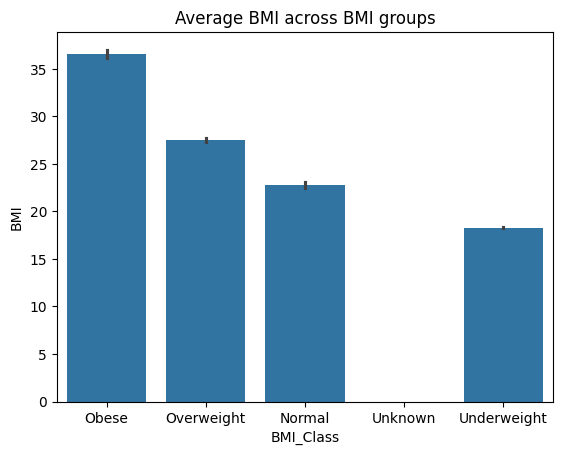

In [33]:
sns.barplot(x='BMI_Class', y='BMI', data=df)
plt.title('Average BMI across BMI groups')
plt.show()

2. Glucose varing over age_groups and outcome


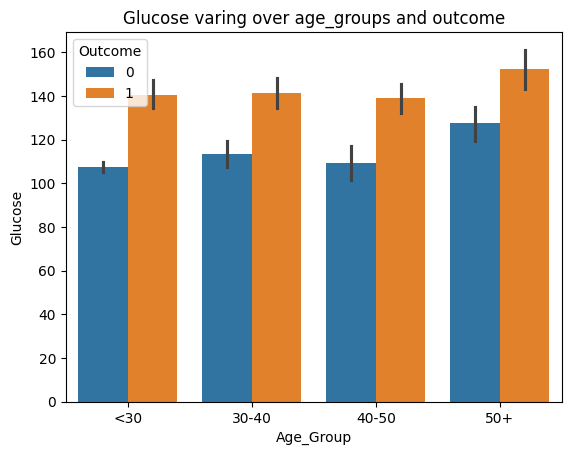

In [35]:
sns.barplot(x='Age_Group', y='Glucose', hue='Outcome', data=df)
plt.title('Glucose varing over age_groups and outcome')
plt.show()

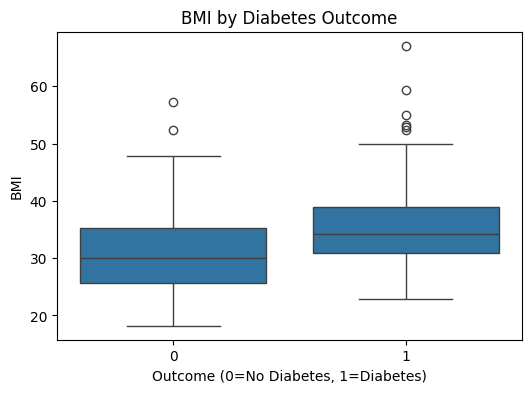

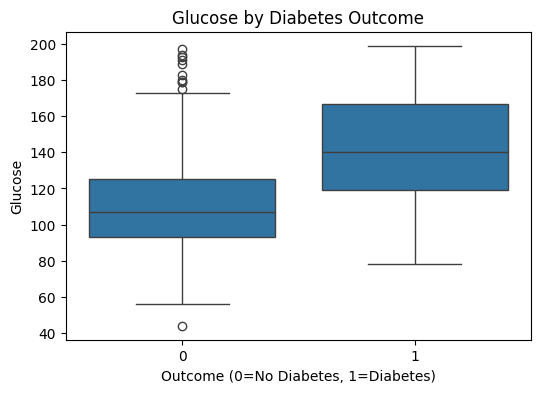

In [38]:
# BMI vs Outcome
plt.figure(figsize=(6,4))
sns.boxplot(x="Outcome", y="BMI", data=df)
plt.title("BMI by Diabetes Outcome")
plt.xlabel("Outcome (0=No Diabetes, 1=Diabetes)")
plt.show()

# Boxplot: Glucose vs Outcome
plt.figure(figsize=(6,4))
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Glucose by Diabetes Outcome")
plt.xlabel("Outcome (0=No Diabetes, 1=Diabetes)")
plt.show()

What is the group with the highest average Glucose?
According to the heatmap, individuals aged 50+ that are diabetic (Outcome = 1) have the highest average glucose levels.
Non-diabetic subjects in all age groups have generally lower averages for blood glucose, but blood glucose increases slightly with age.

Does Age or BMI Forecast Outcome?
Both BMI and Glucose are significantly higher in diabetic patients (Outcome = 1), as evident from the boxplots.

Age by itself is not a potent predictor, but patients are clustered in the diabetic population in later years, and this suggests that it may be a contributing risk factor, rather than an independent predictor.

😲 Any Surprises?
Certain patients with normal/low BMI develop diabetic outcomes, proving that BMI is not sufficient as a predictor of risk of developing diabetes.

Several outliers in the BMI vs Glucose scatterplot have extremely high glucose values in young patients, something that is unusual and should be investigated.

🩺 Clinic Recommendations
📌 Regularly screen all patients older than 50 for blood sugar, particularly those with high BMI.

📌 Don’t rely on BMI alone. Even those with a healthy weight can be diabetic—check with glucose and insulin tests.

📌 Implement preventive education for patients aged between 30–50 years, since prediabetic trends begin in this age range.